<a href="https://colab.research.google.com/github/Maseera-Patni-20/CodeClauseInternship_Customer-Segmentation-with-K-Means-Clustering/blob/main/Cust_Seg_K_M_Clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Customer Segmentation with K-Means Clustering</h5>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv("Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Convert 'Gender' to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Calculate the correlation matrix
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                        CustomerID    Gender       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.057400 -0.026763            0.977548   
Gender                   -0.057400  1.000000 -0.060867           -0.056410   
Age                      -0.026763 -0.060867  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.056410 -0.012398            1.000000   
Spending Score (1-100)    0.013835  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


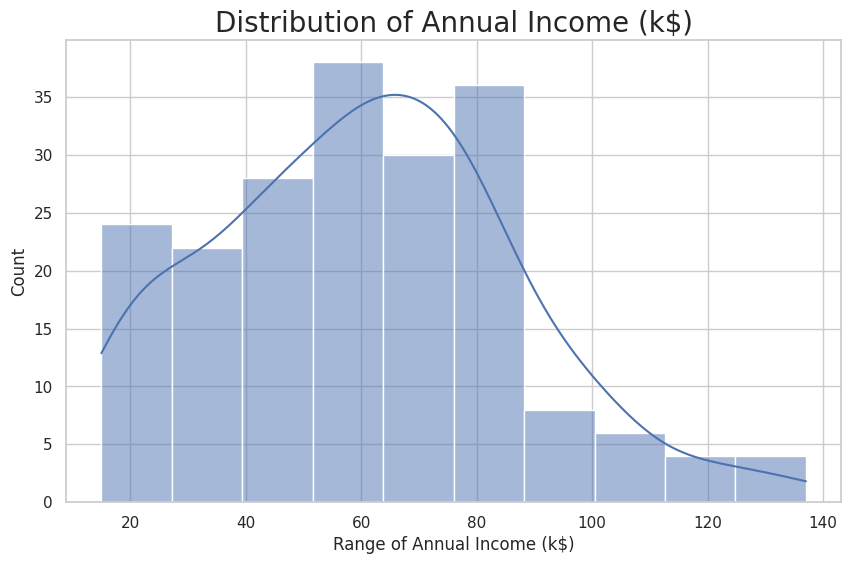

In [ ]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

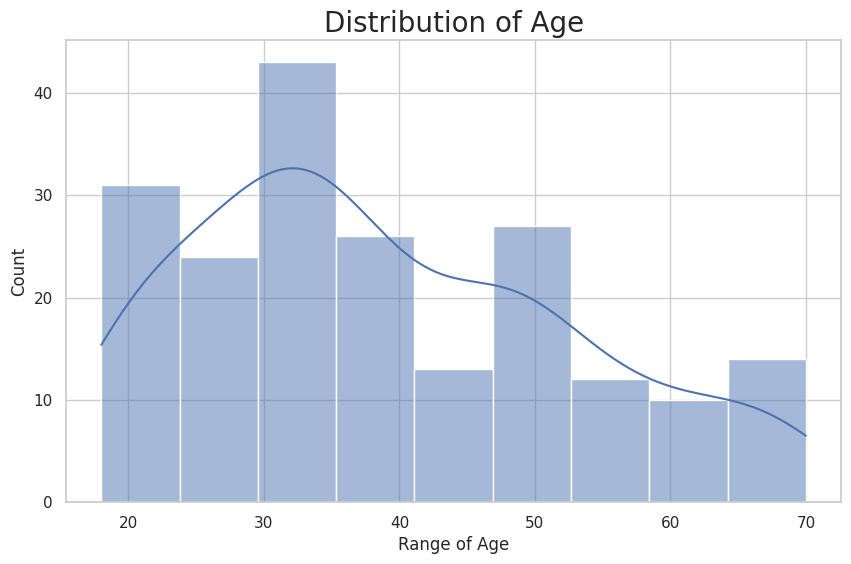

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

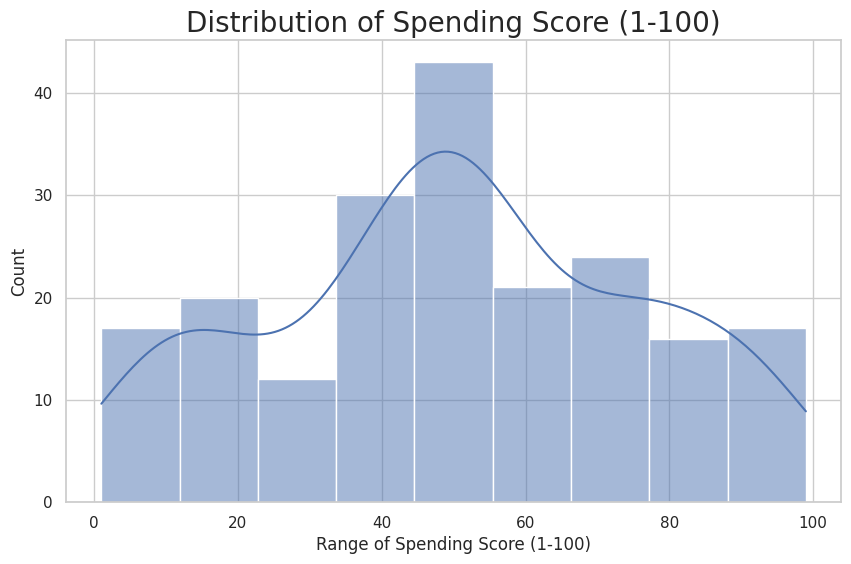

In [ ]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

<ipython-input-57-69cbc22ec8be>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


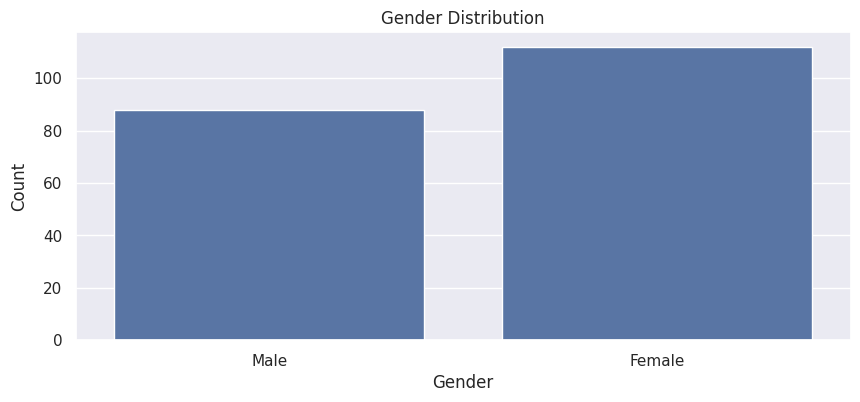

In [ ]:
genders = data['Gender'].value_counts().sort_index()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=genders.index, y=genders.values)
ax.set_xticklabels(['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [ ]:
# K-Means Clustering
df1 = data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

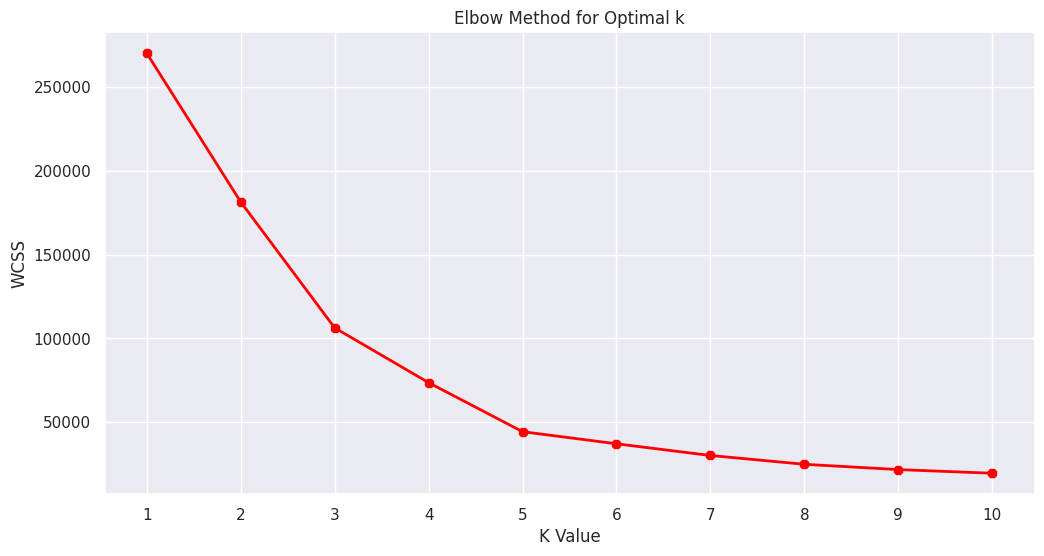

In [ ]:
# The elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Applying K-Means with the optimal number of clusters (let's assume k=5)
km1 = KMeans(n_clusters=5, random_state=42)
km1.fit(X)
df1["label"] = km1.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# The new dataframe with the clustering done
print(df1.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
0           1       0   19                  15                      39      2
1           2       0   21                  15                      81      3
2           3       1   20                  16                       6      2
3           4       1   23                  16                      77      3
4           5       1   31                  17                      40      2


In [ ]:
# For visualization, let's create a 3D plot of the clusters
X2 = df1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
km2 = KMeans(n_clusters=5, random_state=42)
y2 = km2.fit_predict(X2)
df1["label"] = y2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# The data with labels
print(df1.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
0           1       0   19                  15                      39      0
1           2       0   21                  15                      81      4
2           3       1   20                  16                       6      0
3           4       1   23                  16                      77      4
4           5       1   31                  17                      40      0


In [ ]:
# Print the customers in each cluster
for i in range(5):
    cust_group = df1[df1["label"] == i]
    print(f'Number of customers in group {i+1} =', len(cust_group))
    print('They are -', cust_group["CustomerID"].values)
    print("--------------------------------------------")

Number of customers in group 1 = 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customers in group 2 = 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customers in group 3 = 37
They are - [125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]
--------------------------------------------
Number of customers in group 4 = 79
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 1